# Red Wine Quality Prediction

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine.This dataset can be viewed as classification task.This data will allow us to create different classification models to determine how different independent variables help predict our dependent variable, quality.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import power_transform
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('red_wine_quality.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.shape   #checking te data dimensiion

(1599, 12)

In [5]:
df.dtypes   #checking the data types of each column

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
#checking Statistical sumary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


high standard deviation are present in free sulfur dioxide and total sulfur dioxide columns, means data is spread too much. range is high

In [7]:
#checking the null values in the dataset
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

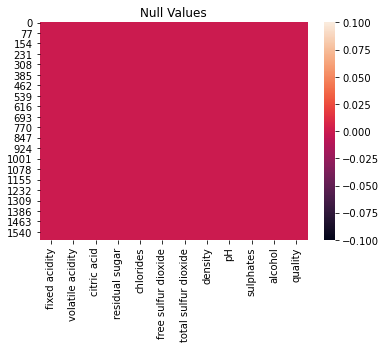

In [8]:
#checking the null values in dataset by using heatmap
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

as we can see there is no white lines in heatmap and the sum of null values in each colum of the dataset is 0. So there is no null values in the dataset

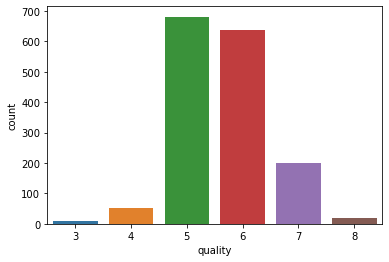

In [9]:
sns.countplot(x='quality',data=df)
plt.show()

As we can see most of the wine quality, ranges from 5 and 6.

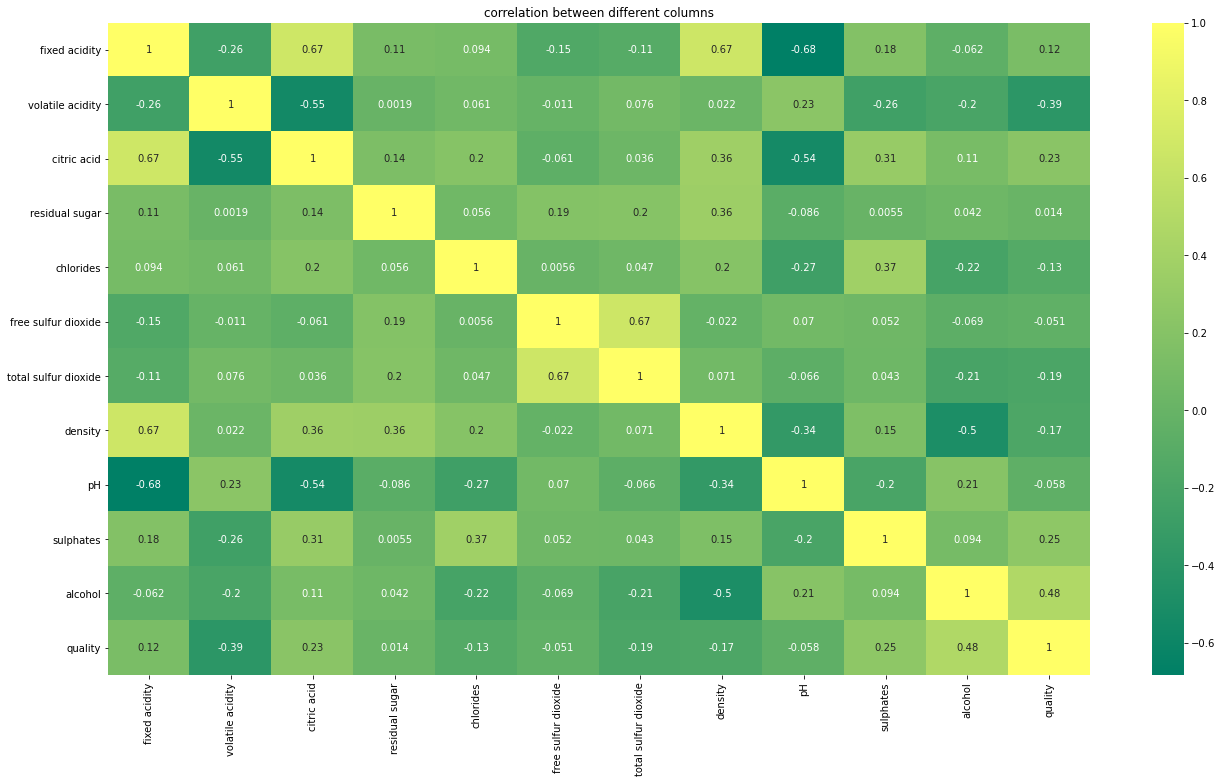

In [10]:
corr_df= df.corr()

plt.figure(figsize=[22,12])
sns.heatmap(corr_df,cmap="summer",annot=True)
plt.title('correlation between different columns')
plt.show()

As we can see from the correlation of different columns from the above heatmap, alcohol and volatile acidity are the most correlated column to the quality.

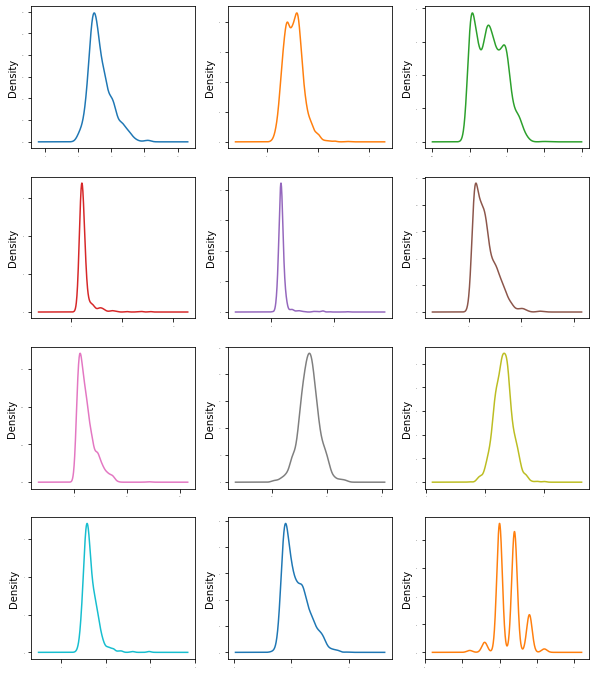

In [11]:
df.plot(kind='density',subplots=True,  layout=(4,3), sharex=False, legend=False, fontsize=1, figsize=(10,12))
plt.show()

In [12]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

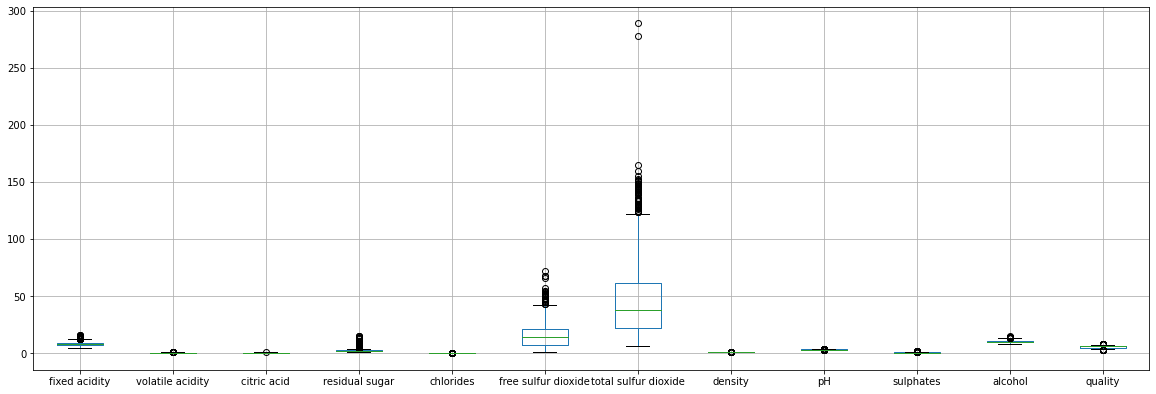

In [13]:
#checking the outliers
df.iloc[:,0:12].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

As we can see there are many columns which have outliers. so we have to remove it.

In [14]:
z=np.abs(zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [15]:
threshold=3
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [16]:
df_new=df[(z<3).all(axis=1)]

In [17]:
df_new.shape

(1451, 12)

In [18]:
df_new.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [19]:
#splitting the dataset into independent and target variables in x and y respectively

x=df_new.drop('quality', axis=1)
y=df_new['quality']

In [20]:
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [21]:
df_new.skew()

fixed acidity           0.018666
volatile acidity        0.004945
citric acid             0.018049
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                -0.001043
pH                     -0.000074
sulphates               0.020799
alcohol                 0.114658
dtype: float64

As we can see that their is no skewness present in the columns

In [22]:
df_new

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424
1,-0.170805,1.919750,-1.524506,0.649155,0.986838,1.091561,0.952517,0.061011,-0.816507,0.451524,-0.530340
2,-0.170805,1.357067,-1.245434,0.207601,0.718578,0.238587,0.624244,0.177435,-0.380977,0.220005,-0.530340
3,1.573404,-1.556675,1.444056,-0.610683,-0.207213,0.440493,0.784119,0.756049,-1.110847,-0.393177,-0.530340
4,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.555136,0.519909,-0.980170,-0.374766,0.622975,1.530980,0.316130,-1.056784,0.953105,-0.393177,0.287037
1447,-1.885464,0.234578,-0.852348,0.031772,-1.120575,1.895825,0.537893,-0.926257,1.428214,0.992572,0.901563
1448,-1.451007,-0.002867,-0.666256,0.207601,-0.145035,1.353642,0.173970,-0.559962,0.746855,0.930432,0.742882
1449,-1.885464,0.766518,-0.727555,-0.374766,-0.207213,1.530980,0.316130,-0.719196,1.762437,0.666655,-0.034166


In [23]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1451, dtype: int64

In [24]:
y=pd.DataFrame(data=y, columns=['quality'])

In [25]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [26]:
x=df_new

In [27]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424
1,-0.170805,1.919750,-1.524506,0.649155,0.986838,1.091561,0.952517,0.061011,-0.816507,0.451524,-0.530340
2,-0.170805,1.357067,-1.245434,0.207601,0.718578,0.238587,0.624244,0.177435,-0.380977,0.220005,-0.530340
3,1.573404,-1.556675,1.444056,-0.610683,-0.207213,0.440493,0.784119,0.756049,-1.110847,-0.393177,-0.530340
4,-0.467878,1.055740,-1.524506,-0.610683,-0.145035,-0.241492,-0.066536,0.640791,1.360860,-0.589657,-1.120424
...,...,...,...,...,...,...,...,...,...,...,...
1446,-1.555136,0.519909,-0.980170,-0.374766,0.622975,1.530980,0.316130,-1.056784,0.953105,-0.393177,0.287037
1447,-1.885464,0.234578,-0.852348,0.031772,-1.120575,1.895825,0.537893,-0.926257,1.428214,0.992572,0.901563
1448,-1.451007,-0.002867,-0.666256,0.207601,-0.145035,1.353642,0.173970,-0.559962,0.746855,0.930432,0.742882
1449,-1.885464,0.766518,-0.727555,-0.374766,-0.207213,1.530980,0.316130,-0.719196,1.762437,0.666655,-0.034166


In [28]:
#finding best random state
maxscore=0
maxrs=0
for i in range(1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20, random_state=i)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    preddtc=dtc.predict(x_test)
    score=accuracy_score(preddtc,y_test)
    if score>maxscore:
        maxscore=score
        maxrs=i
print('best score is ',maxscore,'on random state is',i)

best score is  0.7010309278350515 on random state is 399


In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=299)

In [30]:

from sklearn.neighbors import KNeighborsClassifier

In [31]:
model=[SVC(),RandomForestClassifier(),AdaBoostClassifier(),KNeighborsClassifier()]

In [32]:
for n in model:
    n.fit(x_train,y_train)
    n.score(x_train,y_train)
    predm=n.predict(x_test)
    print('accuracy score of',n,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of SVC() is:
0.6254295532646048
[[ 0  5  2  0  0]
 [ 0 97 30  0  0]
 [ 0 37 72  6  0]
 [ 0  1 22 13  0]
 [ 0  0  4  2  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.69      0.76      0.73       127
           6       0.55      0.63      0.59       115
           7       0.62      0.36      0.46        36
           8       0.00      0.00      0.00         6

    accuracy                           0.63       291
   macro avg       0.37      0.35      0.35       291
weighted avg       0.60      0.63      0.61       291



accuracy score of RandomForestClassifier() is:
0.7216494845360825
[[  0   5   2   0   0]
 [  0 106  21   0   0]
 [  0  26  84   5   0]
 [  0   2  14  20   0]
 [  0   0   4   2   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         7
           5       0.76      0.83      0.80       127
           6       0.67   

Now Checking Cross Validation Score to check whether our model is overfitted or under fitted.

In [33]:
scrdtc=cross_val_score(dtc,x,y, cv=5)
print('cross validation score of DecisionTreeClassifier: ',scrdtc.mean())

cross validation score of DecisionTreeClassifier:  0.4603389027135917


In [34]:
scrsvc=cross_val_score(SVC(),x,y, cv=5)
print('cross validation score of SVC: ',scrsvc.mean())

cross validation score of SVC:  0.5706766204526603


In [35]:
scrrf=cross_val_score(RandomForestClassifier(),x,y, cv=5)
print('cross validation score of RandomForestClassifier: ',scrrf.mean())

cross validation score of RandomForestClassifier:  0.5775684322787059


In [36]:
scrada=cross_val_score(AdaBoostClassifier(),x,y, cv=5)
print('cross validation score of AdaBoostClassifier: ',scrada.mean())

cross validation score of AdaBoostClassifier:  0.3018935892878303


In [37]:
scrkn=cross_val_score(KNeighborsClassifier(),x,y, cv=5)
print('cross validation score of KNeighborsClassifier: ',scrkn.mean())

cross validation score of KNeighborsClassifier:  0.535508946557649


Minimum difference in accuracy score and cross validation score is for SVC (6) so this is our best model.

Doing GridSearchCV for getting best parameters

In [38]:
#creating parameter list to pass in GridSearchCV
parameters= {'kernel': ['linear','rbf','poly'],
             'gamma': ['scale','auto'],}
             

In [39]:
GCV=GridSearchCV(SVC(),parameters,cv=5)

In [40]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [41]:
#getting the best parameters found by GridSearchCV
GCV.best_params_

{'gamma': 'scale', 'kernel': 'rbf'}

In [42]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [43]:
accuracy_score(GCV_pred,y_test)

0.6254295532646048

In [44]:
joblib.dump(GCV.best_estimator_,'wine_quality.obj')

['wine_quality.obj']